# Koneoppiminen: Osa 2: k-means

In [24]:
# Kirjoita tähän tietosi!
student_name = 'Marjo Nopola'
student_id = 'AA9074'

## Tehtävä 1
### Aihe: Siemenaineiston esikäsittely

2 pistettä

Tutustu aineistoon *seeds* osoitteessa https://archive.ics.uci.edu/ml/datasets/seeds .

1. Lue aineisto Pandas-kirjaston DataFrameen.

2. Muista asettaa sarakkeiden nimet aineiston dokumentaation mukaisesti. 

Vinkki: jos tabulaattorit erottimina tuottavat ongelmia, `delim_whitespace=True` auttaa. Se tekee kaikista tyhjistä merkeistä datakenttien erottimia.

In [25]:
# Kirjoita toteutuksesi tähän soluun. Tallenna vastauksesi df-muuttujaan.
import pandas as pd

df = pd.read_csv("seeds_dataset.txt", delim_whitespace=True)

df.columns=["area A", "perimeter P", "compactness C", 
          "length of kernel", "width of kernel",
         "asymmetry coefficient", "length of kernel groove",
           "variety of wheat"]



In [26]:
# Tehtävän vastaukset. Huom! Älä muokkaa tätä solua, vaan aja se, kun olet suorittanut tehtävän. 
# Tallenna DataFrame df-muuttujaan.
print(f'Columns: {df.columns}')
print(f'First row by position: {df.iloc[0]}')

Columns: Index(['area A', 'perimeter P', 'compactness C', 'length of kernel',
       'width of kernel', 'asymmetry coefficient', 'length of kernel groove',
       'variety of wheat'],
      dtype='object')
First row by position: area A                     14.8800
perimeter P                14.5700
compactness C               0.8811
length of kernel            5.5540
width of kernel             3.3330
asymmetry coefficient       1.0180
length of kernel groove     4.9560
variety of wheat            1.0000
Name: 0, dtype: float64


## Tehtävä 2
### Aihe: Visualisointi

2 pistettä

Katsotaan näkyykö datassa ryhmittelyjä eri muuttujien suhteen.

Visualisoi aineisto käyttäen Seabornin [pairplot](https://seaborn.pydata.org/examples/scatterplot_matrix.html) -funktiota (tunnetaan myös nimellä scatterplot matrix). 

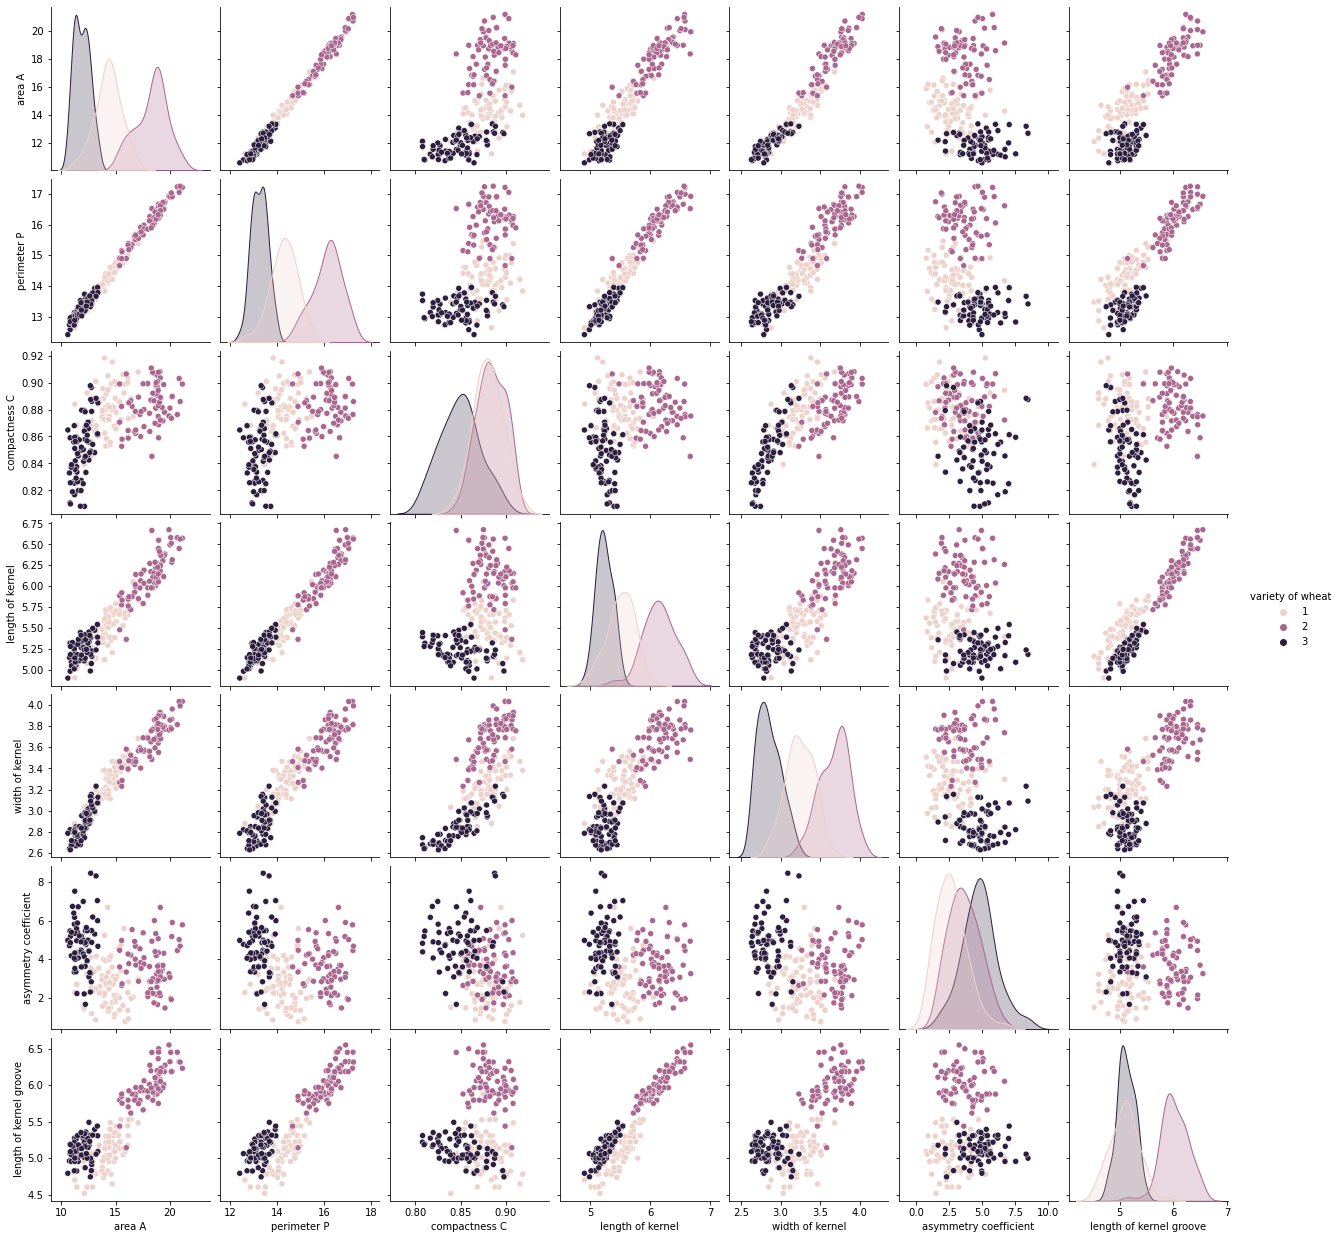

In [27]:
# Kirjoita toteutuksesi tähän soluun.

import seaborn as sns

ax = sns.pairplot(df, hue='variety of wheat')

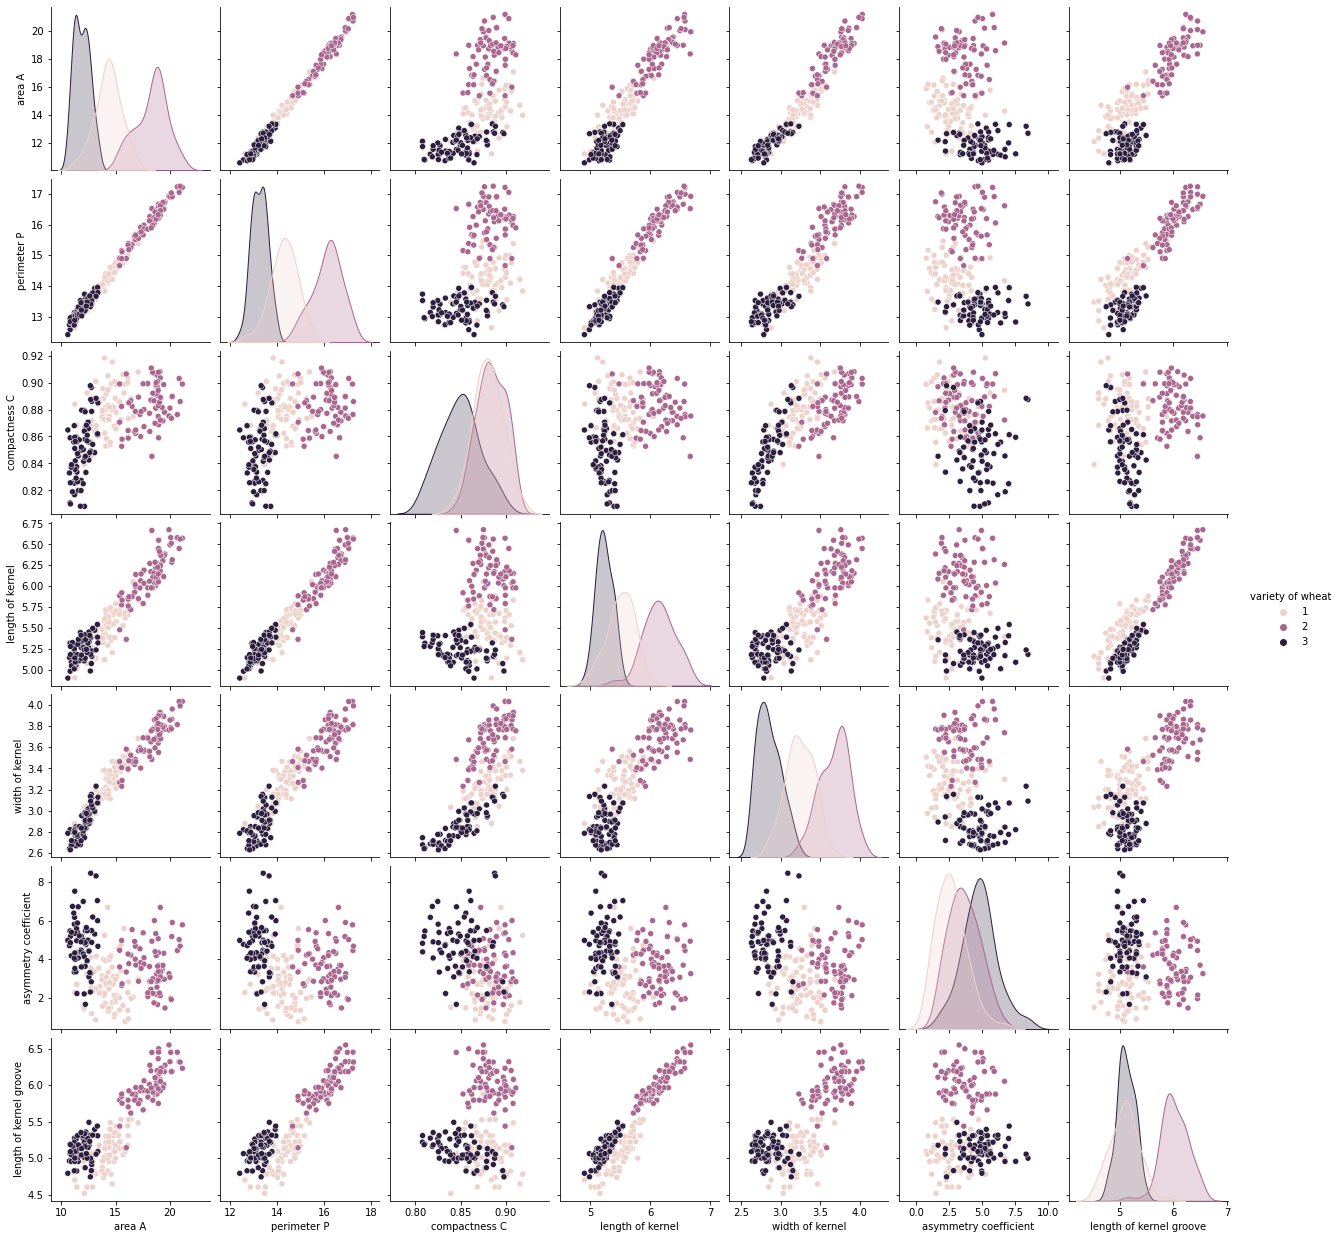

In [28]:
# Tehtävän vastaukset. Huom! Älä muokkaa tätä solua, vaan aja se, kun olet suorittanut tehtävän. 
# Tee vastauksesi siten, että tämän solun tuloksena näkyy alla kaaviokuva. 
ax.fig

## Tehtävä 3
### Aihe: k-means

6 pistettä

1. Suorita klusterointi aineistolle käyttäen `scikit-learn`-kirjaston `cluster`-moduulin [k-means-menetelmää](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.k_means.html). 

HUOM! Älä sisällytä luokkamuuttujaa klusterointiin. 

2. Visualisoi jälleen klusterit käyttäen Seabornin `pairplot` -funktiota. 

Tallenna klusteroinnin tulokset DataFramen `df` sarakkeeseen `cluster`.

Vinkki: Tiedetään, että aineistossa on mitattu kolmea erilaista kasvia. 

Vinkki: `pairplot`-funktiossa on `hue`-parametri värin asettamiseen.

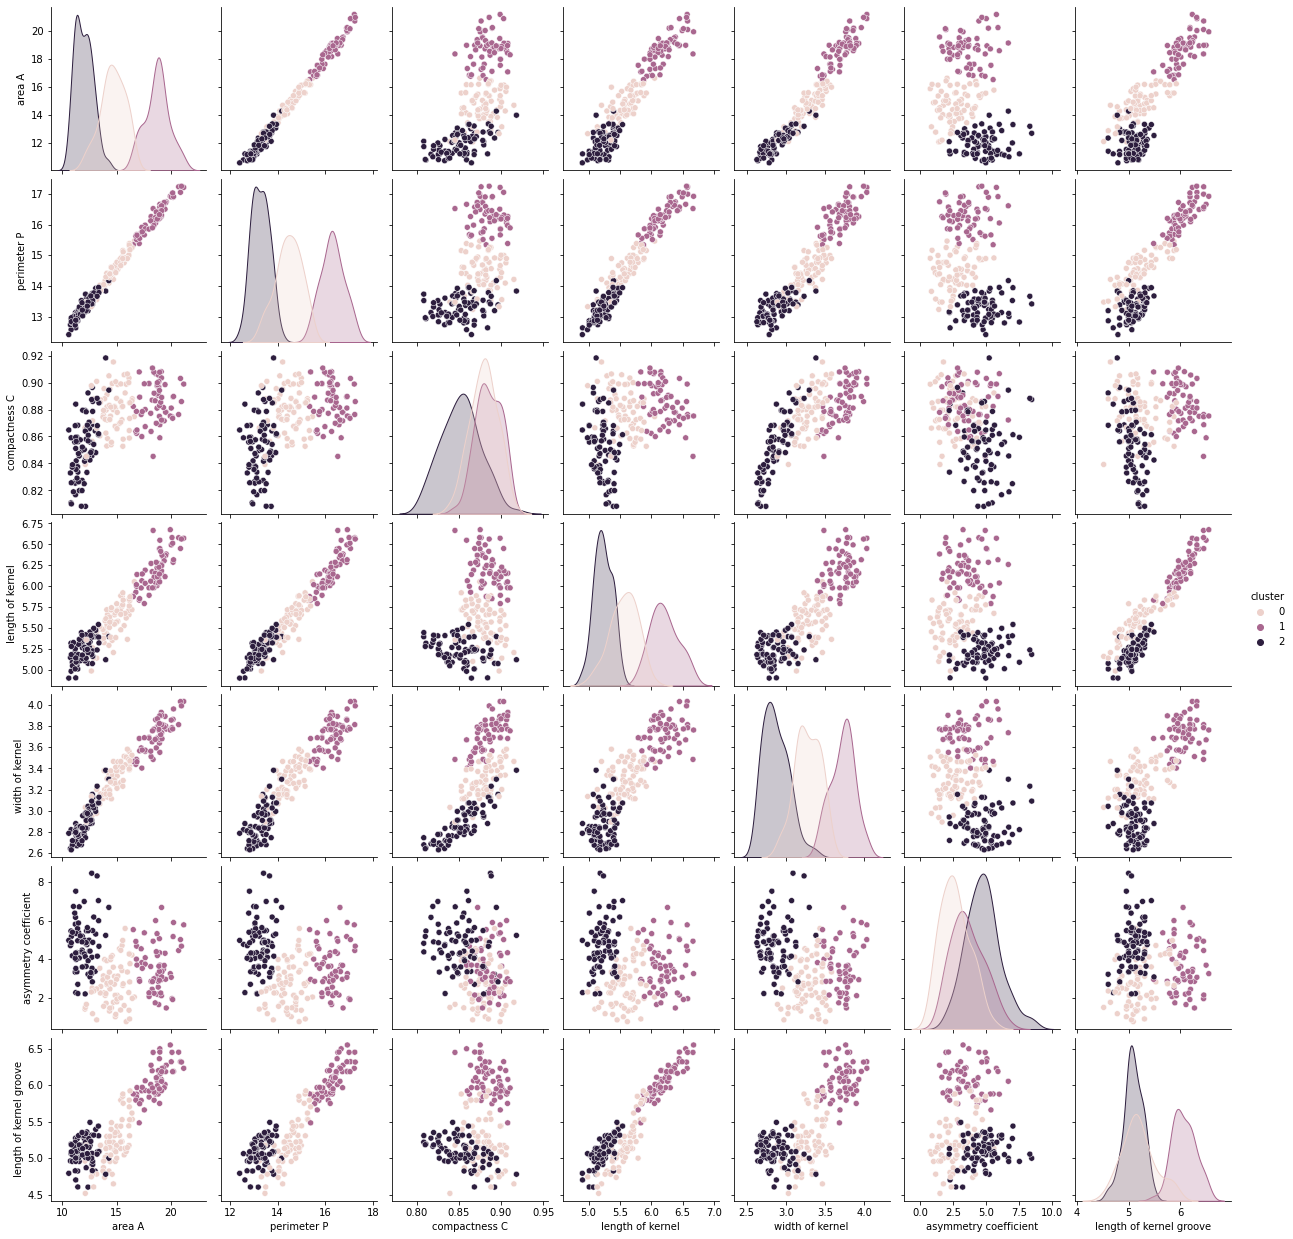

In [29]:
# Kirjoita toteutuksesi tähän soluun. Tallenna vastauksesi df-muuttujaan.
from sklearn.cluster import KMeans

df = df.drop('variety of wheat', axis=1)

kmeans = KMeans(n_clusters=3).fit(df)

# Get the cluster centroids
#kmeans.cluster_centers_
    
# Get the cluster labels
df['cluster'] = kmeans.labels_

ax = sns.pairplot(df, hue='cluster')


Clusters: 0      0
1      0
2      0
3      0
4      0
      ..
204    2
205    2
206    2
207    2
208    2
Name: cluster, Length: 209, dtype: int32


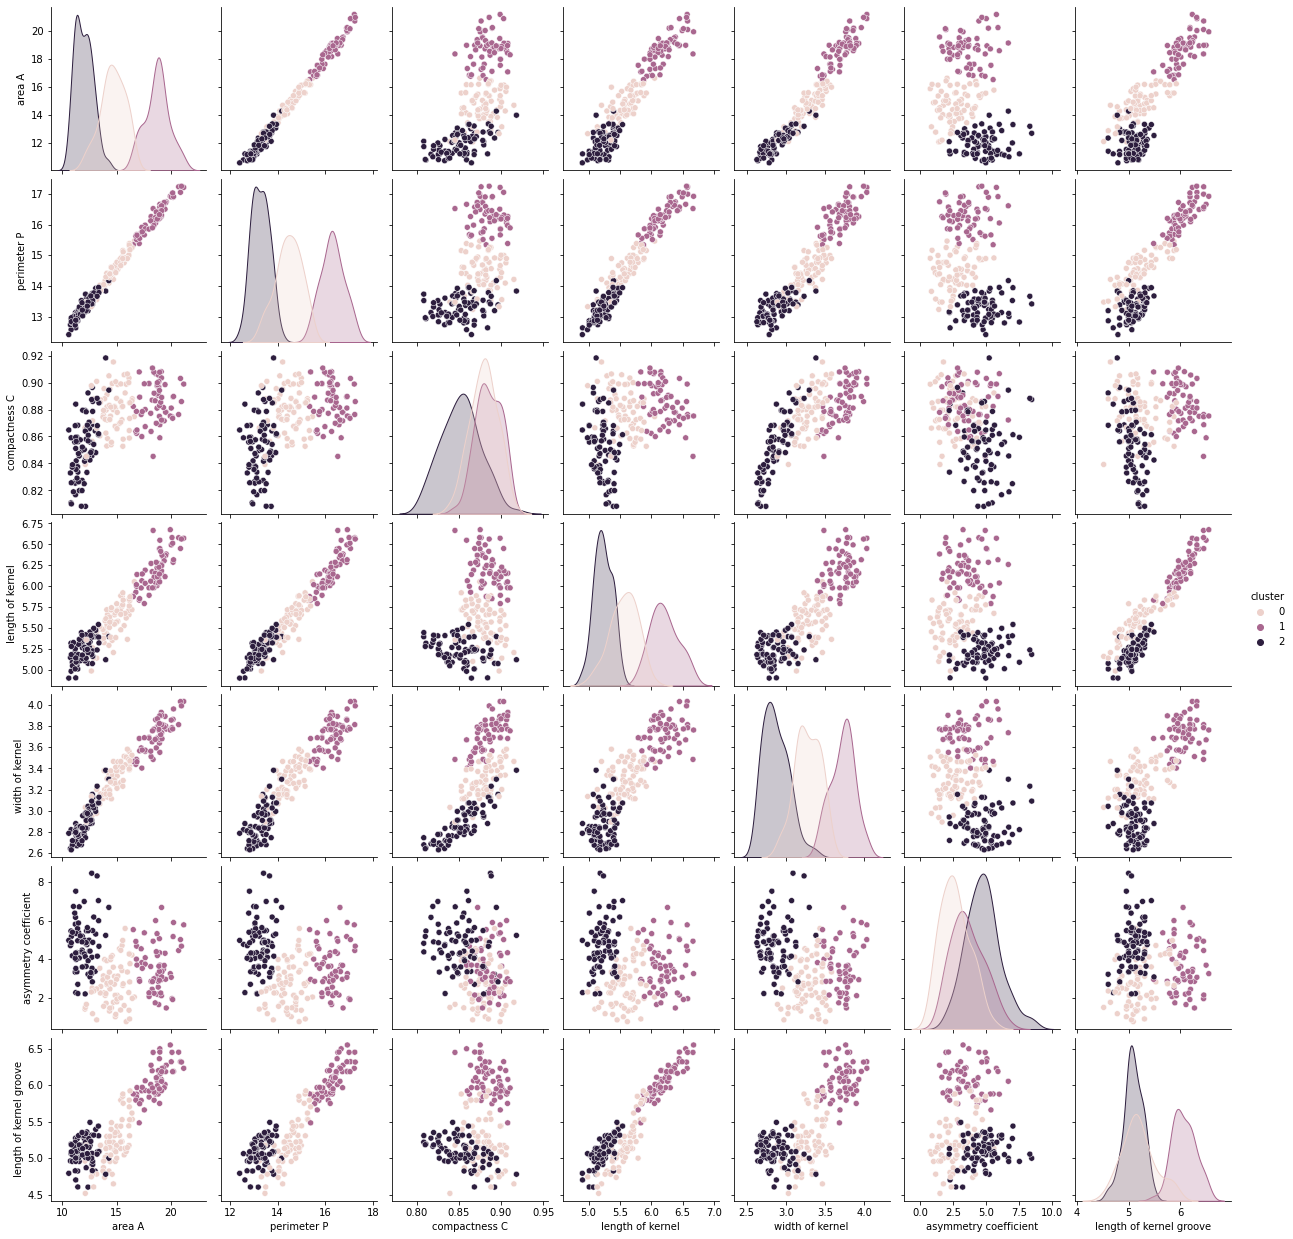

In [30]:
# Tehtävän vastaukset. Huom! Älä muokkaa tätä solua, vaan aja se, kun olet suorittanut tehtävän. 
# Tee vastauksesi siten, että tämän solun tuloksena näkyy alla kaaviokuva.
print(f'Clusters: {df["cluster"]}')
ax.fig